In [ ]:
# @title Importing Libraries

from google.colab import files

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


In [ ]:
# @title Data Preprocessing

# data = pd.read_csv("kl.csv", encoding='latin-1')
# from google.colab import drive
# drive.mount('/content/drive')

data =pd.read_csv("kl.csv",error_bad_lines=False)

data= data.sample(n=10000, random_state=42)
data=data.fillna(0)

# print(data)

<ipython-input-2-c08f627e73ff>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data =pd.read_csv("kl.csv",error_bad_lines=False)


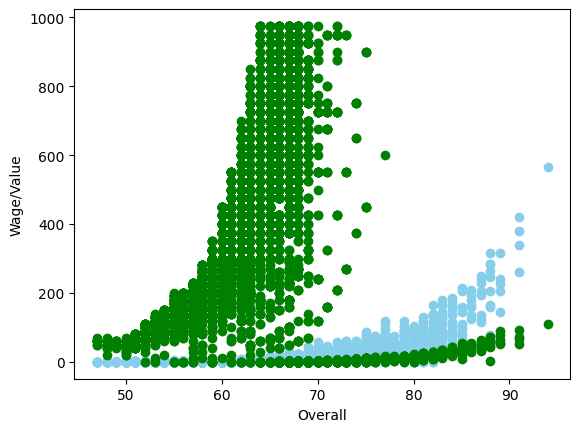

In [ ]:
# @title Visualization
x=data['Overall']
y=data['Wage']
y1=data['Value']
# clubs = data['Club'].unique()
# print(clubs)
plt.xlabel('Overall')
plt.ylabel('Wage/Value')
plt.scatter(x,y,color="skyblue") #overall-wage
plt.scatter(x,y1,color="green")  # overall-value
plt.show()

In [ ]:
# @title Feature Selection
# Each player in FIFA Ultimate Team has an overall rating as well as six scores for the key stats; Pace, Shooting, Passing, Dribbling, Defending, and Physical.
# features = ['Age', 'Finishing', 'ShotPower', 'Dribbling', 'Reactions','BallControl','Stamina','Strength','Composure']
features=['Age','Reactions','Finishing','BallControl','Dribbling','Positioning','GKReflexes']
x = data[features]
# print(data['GKDiving'].isnull().sum())
y = data['Overall'] # target variable


float64
R-squared error=  0.7294674513486843
Mean_squared error = 0.7294674513486843


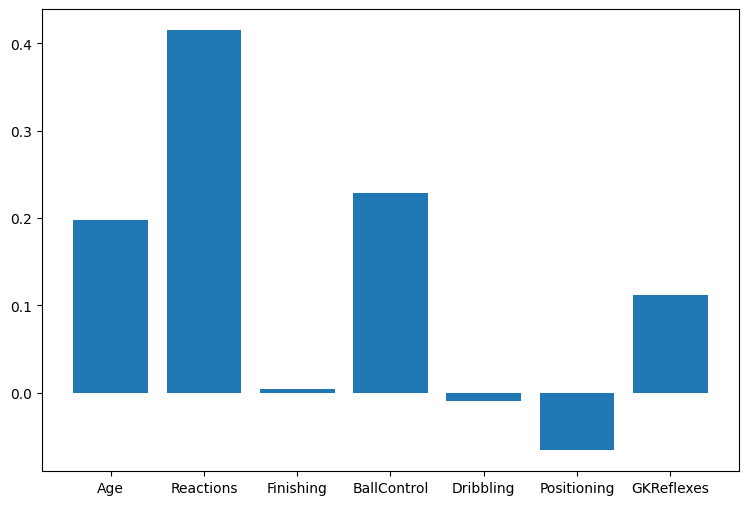

In [ ]:
# @title MLR MODEL

from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(y_train.dtype)


# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Visualize -;We r going to plot  based on the importance of these features wtr to overall,for that we use coefficenits or weights assigned to each variable or feature
plt.figure(figsize=(9, 6))
feature_importances = model.coef_
# print(feature_importances)
plt.bar(features,feature_importances)


# Evaluate the MLR model
mse_mlr = mean_squared_error(y_test, y_pred)
r2_mlr = r2_score(y_test, y_pred)
print("R-squared error= ", r2_mlr)
print("Mean_squared error =", r2_mlr)


[0.0540726  0.7016634  0.01817728 0.10128894 0.03178369 0.03720485
 0.01805191 0.03775732]
R-squared error=  0.8703563264953567
Mean_squared error = 5.686487720833335
Best Hyperparameters (RandomizedSearch): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Tuned R-squared error (RandomizedSearch) = 0.8683364635766705
Tuned Mean Squared Error (RandomizedSearch) = 5.775083834892568


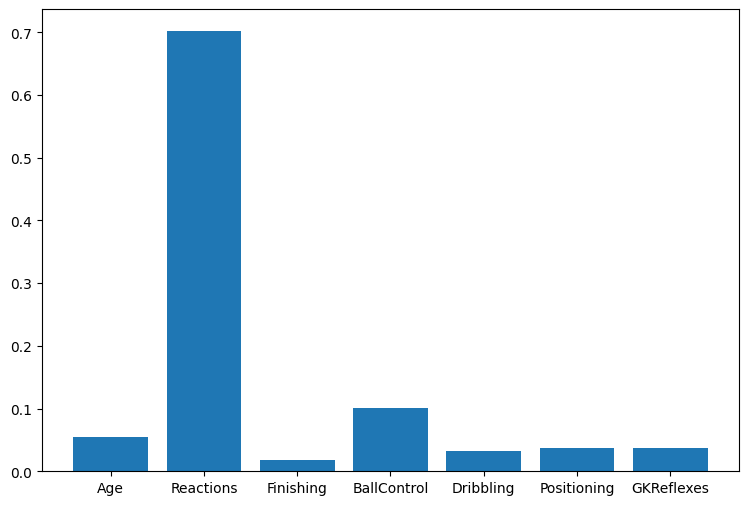

In [ ]:
# @title Random Forest Model
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train the Random Forest  model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Visualize -
feature_importances = model.feature_importances_
print(feature_importances)
plt.figure(figsize=(9, 6))
plt.bar(features,feature_importances)

# Evaluate the RF model
rf_mlr_mse = mean_squared_error(y_test, y_pred)
rf_mlr_r2 = r2_score(y_test, y_pred)
print("R-squared error= ", rf_mlr_r2)
print("Mean_squared error =", rf_mlr_mse)

### Hyperparamter Tuning

# choosing  hyperparameters
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations
    scoring='neg_mean_squared_error',
    cv=3,  # Adjust the number of folds
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_
print("Best Hyperparameters (RandomizedSearch):", best_params_random)

# Train a new model with the best hyperparameters
best_rf_model_random = RandomForestRegressor(**best_params_random, random_state=42)
best_rf_model_random.fit(x_train, y_train)

# Make predictions on the test set
y_pred_best_random = best_rf_model_random.predict(x_test)

# Evaluate the tuned RF model
rf_mse_best_random = mean_squared_error(y_test, y_pred_best_random)
rf_r2_best_random = r2_score(y_test, y_pred_best_random)
print("Tuned R-squared error (RandomizedSearch) =", rf_r2_best_random)
print("Tuned Mean Squared Error (RandomizedSearch) =", rf_mse_best_random)




In [ ]:
# @title KNN

# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x and y are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# print(x_test.size)
# print(y_test.size)

# Instantiate the KNN model
# print(x_test)
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
plt.figure(figsize=(9, 6))
# plt.scatter(x_test,y_test,color="lightgreen")

# Evaluate the RF model
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
print("R-squared error= ", knn_r2)
print("Mean_squared error =", knn_mse)


## hypermater tuning

# Define the hyperparameter grid for RandomizedSearchCV
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search to the data
random_search_knn.fit(x_train, y_train)
y_pred=knn_model.predict(x_test)

# Get the best hyperparameters
best_params_random_knn = random_search_knn.best_params_
print("Best Hyperparameters (RandomizedSearch - KNN):", best_params_random_knn)

# Train a new KNN model with the best hyperparameters
best_knn_model_random = KNeighborsRegressor(**best_params_random_knn)
best_knn_model_random.fit(x_train, y_train)

# Make predictions on the test set
y_pred_best_random_knn = best_knn_model_random.predict(x_test)

# Evaluate the tuned KNN model
knn_mse_best_random = mean_squared_error(y_test, y_pred_best_random_knn)
knn_r2_best_random = r2_score(y_test, y_pred_best_random_knn)
print("Tuned R-squared error (RandomizedSearch - KNN) =", knn_r2_best_random)
print("Tuned Mean Squared Error (RandomizedSearch - KNN) =", knn_mse_best_random)


R-squared error=  0.832030580562727
Mean_squared error = 7.23992
Best Hyperparameters (RandomizedSearch - KNN): {'weights': 'distance', 'p': 2, 'n_neighbors': 10}
Tuned R-squared error (RandomizedSearch - KNN) = 0.8570967059921563
Tuned Mean Squared Error (RandomizedSearch - KNN) = 6.159504627803015


<Figure size 900x600 with 0 Axes>

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# print(data['Overall'])
x=data.drop(['Overall'],axis=1)
y=data['Overall']
# Create a Random Forest model
model_for_feature_selection = RandomForestRegressor(n_estimators=100, random_state=42)

# Create an RFE selector
selector = RFE(model_for_feature_selection, n_features_to_select=1)

# Fit the selector to your data
selector = selector.fit(x_train, y_train)

# Get the ranking of each feature
feature_ranking = selector.ranking_

# Print the ranking of each feature
print("Feature Ranking:", feature_ranking)

# Get the selected features
selected_features = x_train.columns[selector.support_]
print("Selected Features:", selected_features)





17097    62.0
11506    67.0
17935    61.0
19851    58.0
18892    60.0
         ... 
13847    65.0
21559    51.0
12442    66.0
2456     67.0
8823     70.0
Name: Overall, Length: 10000, dtype: float64
Feature Ranking: [4 1 8 2 7 3 6 5]
Selected Features: Index(['Reactions'], dtype='object')


int64
R-squared error=  0.4057253282290273
Mean_squared error = 0.4057253282290273
Accuracy: 0.398


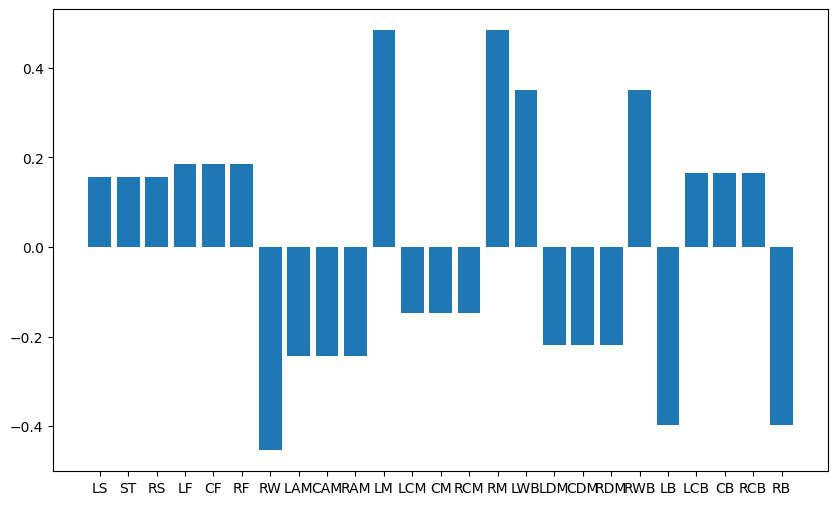

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
columns_to_sum = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
# columns_to_sum = ['LS','ST','RS','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LCB','CB','RCB']
data[columns_to_sum] = data[columns_to_sum].apply(lambda x: x.apply(lambda y: sum(map(int, str(y).split('+'))) if isinstance(y, str) else y))

# Convert position labels to strings
data['Position'] = data['Position'].astype(str)

# Assuming 'features' is a list of relevant feature names
feature_names = columns_to_sum
X = data[feature_names]

# Convert position labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Position'])
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.dtype)


# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize -;We r going to plot  based on the importance of these features wtr to overall,for that we use coefficenits or weights assigned to each variable or feature
plt.figure(figsize=(10, 6))
feature_importances = model.coef_
# print(feature_importances)
plt.bar(feature_names,feature_importances)


# Evaluate the MLR model
mse_mlr = mean_squared_error(y_test, y_pred)
r2_mlr = r2_score(y_test, y_pred)
print("R-squared error= ", r2_mlr)
print("Mean_squared error =", r2_mlr)


# Assuming 'features' is a DataFrame containing relevant features and 'positions' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


In [ ]:
# Assume 'new_input' is a DataFrame with the same features as your training data
new_input = pd.DataFrame({
    'LS': [90],
    'ST': [90],
    'RS': [90],
    'LW': [94],
    'LF': [95],
    'CF': [95],
    'RF': [95],
    'RW': [94],
    'LAM': [95],
    'CAM':[95],
    'RAM': [95],
    'LM': [93],
    'LCM': [86],
    'CM': [86],
    'RCM': [86],
    'RM': [93],
    'LWB': [66],
    'LDM': [63],
    'CDM': [63],
    'RDM': [63],
    'RWB': [66],
    'LB': [61],
    'LCB': [49],
    'CB': [49],
    'RCB': [49],
    'RB': [61]
})

# Apply the same transformations to the new input data
new_input[columns_to_sum] = new_input[columns_to_sum].apply(lambda x: x.apply(lambda y: sum(map(int, str(y).split('+'))) if isinstance(y, str) else y))

# Make predictions using the trained model
new_predictions = model.predict(new_input)

# Convert the predicted numerical values back to original labels using inverse_transform
predicted_positions = label_encoder.inverse_transform(new_predictions)

print("Predicted Positions:", predicted_positions)


Predicted Positions: ['RF']


In [ ]:
# Assume 'new_input' is a DataFrame with the same features as your training data200
new_input = pd.DataFrame({
    'LS': [61],
    'ST': [61],
    'RS': [61],
    'LW': [57],
    'LF': [58],
    'CF': [58],
    'RF': [58],
    'RW': [57],
    'LAM': [57],
    'CAM':[57],
    'RAM': [57],
    'LM': [59],
    'LCM': [63],
    'CM': [63],
    'RCM': [63],
    'RM': [59],
    'LWB': [77],
    'LDM': [79],
    'CDM': [79],
    'RDM': [79],
    'RWB': [77],
    'LB': [80],
    'LCB': [89],
    'CB': [89],
    'RCB': [89],
    'RB': [80]
})

# Apply the same transformations to the new input data
new_input[columns_to_sum] = new_input[columns_to_sum].apply(lambda x: x.apply(lambda y: sum(map(int, str(y).split('+'))) if isinstance(y, str) else y))

# Make predictions using the trained model
new_predictions = model.predict(new_input)

# Convert the predicted numerical values back to original labels using inverse_transform
predicted_positions = label_encoder.inverse_transform(new_predictions)

print("Predicted Positions:", predicted_positions)


Predicted Positions: ['RCB']
